<a href="https://colab.research.google.com/github/gayathrisarvani861/tsf-grip-task1-supervised-ML/blob/main/GRIPTask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TSF GRIP: The Sparks Foundation**- *Data Science and Business Analytics Internship*
# **TASK 1- PREDICTION USING SUPERVISED MACHINE LEARNING**
Predict the percentage of a student based on the no. of study hours.

● This is a simple linear regression task as it involves just 2 variables.

● You can use R, Python, SAS Enterprise Miner or any other tool

*Author: P.Gayathri Sarvani*

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SML.csv to SML.csv


In [ ]:
#reading the data
df=pd.read_csv('SML.csv')

**EXPLORING THE DATA**

In [ ]:
#displaying the first five rows using the head() function.
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#displaying the last five rows using the tail() function.
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
#getting to know the shape of the dataframe
df.shape
#the result indicates that there are 25 rows and 2 columns

(25, 2)

In [ ]:
#dtypes function is used to know the datatype of each column
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [ ]:
#we use info() method to print a concise summary of a DataFrame.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
#from the result above, it is quite evident that there are no null values, however to check the null values in a dataframe, we use:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
#describe() method is used to generate descriptive statistics.
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
#to remove duplicate data from the dataframe
duplicatedata=df.duplicated()
print(duplicatedata.sum())
df[duplicatedata]
#the result indicates that our dataframe does not contain duplicate values.

0


,Hours,Scores


In [ ]:
df.count()
#to count how many rows are there in each column

Hours     25
Scores    25
dtype: int64

**VISUALIZING THE DATA**

<function matplotlib.pyplot.show>

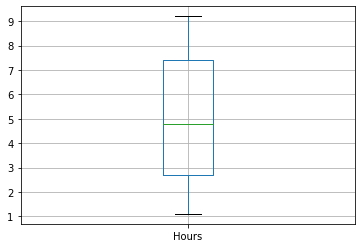

In [ ]:
#OUTLIERS

#An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It’s often a good idea to detect and remove the outliers.
#Often outliers can be seen with visualizations using a box plot.

df.boxplot(column='Hours')
plt.show

<function matplotlib.pyplot.show>

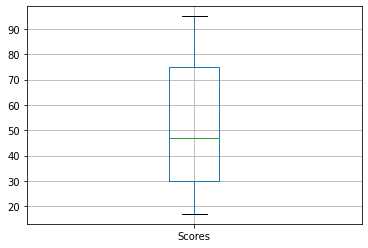

In [ ]:
df.boxplot(column='Scores')
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


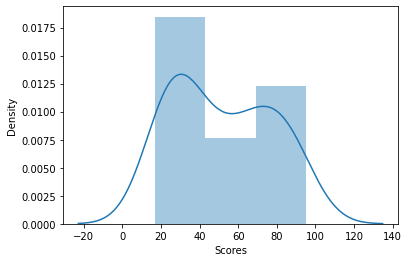

In [ ]:
#DISTRIBUTION PLOT :  Flexibly plot a univariate distribution of observations.
sns.distplot(df['Scores'])


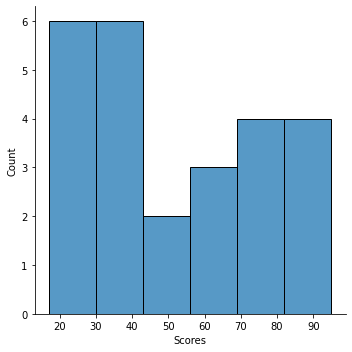

In [ ]:
sns.displot(df['Scores'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


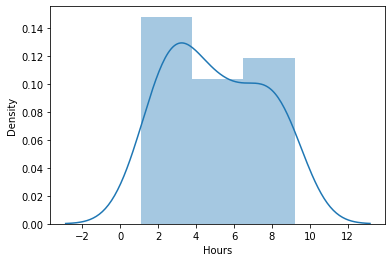

In [ ]:
sns.distplot(df['Hours'])

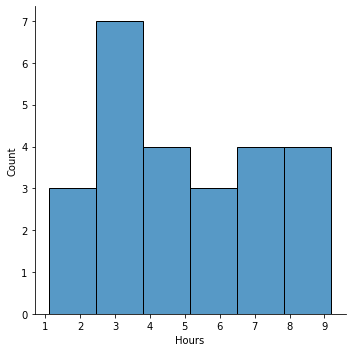

In [ ]:
sns.displot(df['Hours'])

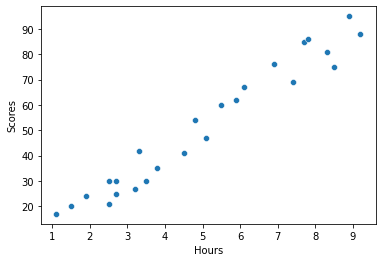

In [ ]:
#BIVARIATE ANALYSIS
#Scatter Plot: A scatter plot is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data
sns.scatterplot(data=df, x="Hours", y="Scores")
#from the graph below, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [ ]:
df.corr() #positive linear relationship

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**PERFORMING SIMPLE LINEAR REGRESSION**

Simple Linear Regression is a type of Regression algorithms that models the relationship between a dependent variable and a single independent variable. The relationship shown by a Simple Linear Regression model is linear or a sloped straight line, hence it is called Simple Linear Regression.
y=mx+c where m is the slope and c is the intercept

In [ ]:
#Seperating target and predictor variables 
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

In [ ]:
#spliting the data into training and test sets using train_test_split(), 80% of the data is being trained and 20% is being tested.
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50) 

In [ ]:
#training the algorithm
from sklearn.linear_model import LinearRegression 

In [ ]:
lr = LinearRegression()  

In [ ]:
lr.fit(X_train, y_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

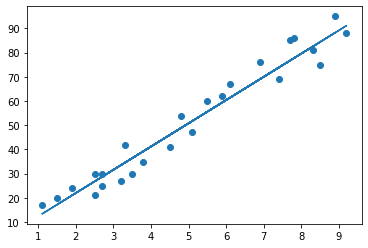

In [ ]:
m=lr.coef_
c=lr.intercept_
line = m*X + c

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [ ]:
#Making Predictions
score_pred = lr.predict(X_test)
score_pred
 # Predicting the scores

array([88.21139357, 28.71845267, 69.02012231, 39.27365186, 13.36543566])

In [ ]:
# Actual vs Predicted Comparision
df = pd.DataFrame({ 'Actual': y_test, 'Predicted': score_pred})  
df

,Actual,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


In [ ]:
#Evaluating the model
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, score_pred)) 

Mean Absolute Error: 4.5916495300630285


In [ ]:
#Test: what would be the predicted score of the student who studies for 9.25hrs?

hours = 9.25
pred_score=lr.predict([[hours]])
print("Predicted Score = {}".format(pred_score[0]))

Predicted Score = 91.56986604454478
